## 5. Prepare Data

[Data Science Playlist on YouTube](https://www.youtube.com/watch?v=tBfGYKITno8&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy)
[![Python Data Science](https://apmonitor.com/che263/uploads/Begin_Python/DataScience05.png)](https://www.youtube.com/watch?v=tBfGYKITno8&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy "Python Data Science")

Much of data science and machine learning work is getting clean data into the correct form. This may include data cleansing to remove outliers or bad information, scaling for machine learning algorithms, splitting into train and test sets, and enumeration of string data. All of this needs to happen before regression, classification, or other model training. Fortunately, there are functions that help with automating data preparation.

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Generate Sample Data

Run the following cell to generate the sample data that is corrupted with NaN (not a number) and outliers that are corrupted data points far outside of the expected trend.

In [1]:
import numpy as np
import pandas as pd
np.random.seed(1)
n = 100
tt = np.linspace(0,n-1,n)
x = np.random.rand(n)+10+np.sqrt(tt)
y = np.random.normal(10,x*0.01,n)
x[1] = np.nan; y[2] = np.nan  # 2 NaN (not a number)
for i in range(3):            # add 3 outliers (bad data)
    ri = np.random.randint(0,n)
    x[ri] += np.random.rand()*100
data = pd.DataFrame(np.vstack((tt,x,y)).T,\
                    columns=['time','x','y'])
data.head()

,time,x,y
0,0.0,10.417022,10.032880
1,1.0,NaN,9.762991
2,2.0,11.414328,NaN
3,3.0,12.034383,10.099642
4,4.0,12.146756,10.027949


![analyze](https://apmonitor.com/che263/uploads/Begin_Python/analyze.png)

### Visualize Data

The outliers are shown on a semi-logy plot. The `NaN` values do not show on the plot and are missing points.

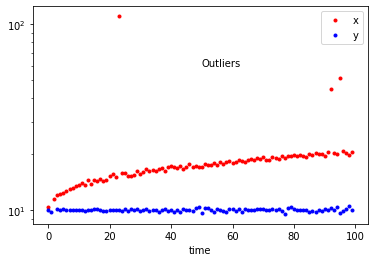

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.semilogy(tt,x,'r.',label='x')
plt.semilogy(tt,y,'b.',label='y')
plt.legend(); plt.xlabel('time')
plt.text(50,60,'Outliers')
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Remove Outliers and Bad Data

NaN values are removed with `numpy` by identifying rows `ix` that contain `NaN`. Next, the rows are removed with `z=z[~iz]` where `~` is a bitwise `not` operator.

In [3]:
z = np.array([[      1,      2],
              [ np.nan,      3],
              [      4, np.nan],
              [      5,      6]])
iz = np.any(np.isnan(z), axis=1)
print(~iz)
z = z[~iz]
print(z)

[ True False False  True]
[[1. 2.]
 [5. 6.]]


 The method `dropna` is a command to drop `NaN` rows in a `pandas` `DataFrame`. Rows 1 and 2 are dropped.

In [4]:
# drop any row with bad (NaN) values
data = data.dropna()
data.head()

,time,x,y
0,0.0,10.417022,10.032880
3,3.0,12.034383,10.099642
4,4.0,12.146756,10.027949
5,5.0,12.328407,10.093944
6,6.0,12.635750,9.971907


There are several graphical techniques to help detect outliers. A box or histogram plot shows the 3 outlying points.

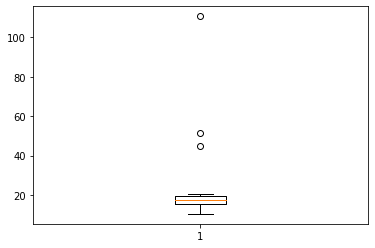

In [5]:
plt.boxplot(data['x'])
plt.show()

A Grubbs test or [other statistical measures](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) can detect outliers. The Grubbs test, in particular, assumes univariate, normally distributed data and is intended to detect only a single outlier. In practice, many outliers be eliminated by removing points that violate a change limit or upper / lower bounds. The statement `data[data['x']<30]` keeps the rows where x is less than 30.

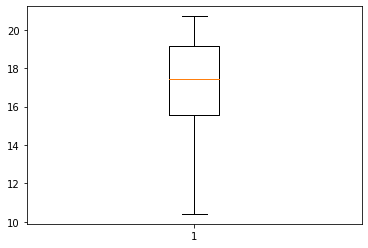

In [6]:
data = data[data['x']<30]
plt.boxplot(data['x'])
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Time Activity

Without looking at a clock, run this cell to record 1 second intervals for 10 seconds. When you run the cell, press `Enter` everytime you think 1 second has passed. After you collect the data, use a boxplot to identify any data points in `tsec` that are outliers.

In [7]:
import time
from IPython.display import clear_output
tsec = []
input('Press "Enter" to record 1 second intervals'); t = time.time()
for i in range(10):
    clear_output(); input('Press "Enter": ' + str(i+1))
    tsec.append(time.time()-t); t = time.time()
clear_output(); print('Completed. Add boxplot to identify outliers')

Completed. Add boxplot to identify outliers


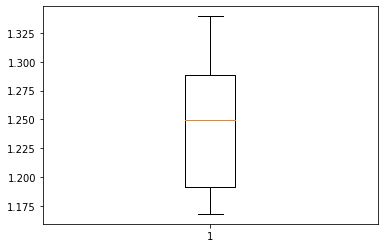

In [11]:
# Add a boxplot to identify outliers
plt.boxplot(tsec)
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Scale Data

The `sklearn` package has a `preprocessing` module to implement common scaling methods. The `StandardScalar` is shown below where each column is normalized to zero mean and a standard deviation of one. The common scaling methods `fit_transform(X)` to fit and transform, `transform(X)` to transform based on another fit, and `inverse_transform(Xs)` to scale back to the original representation.

In [12]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
print(ds[0:5]) # print 5 rows

[[-1.78508369 -2.87324163  0.07737234]
 [-1.67768473 -2.1853612   0.50456644]
 [-1.64188508 -2.13756801  0.04582181]
 [-1.60608543 -2.06031011  0.46810748]
 [-1.57028578 -1.9295938  -0.3127774 ]]


The value `ds` is returned as a `numpy` array so we need to convert it back to a `pandas` `DataFrame`, re-using the column names from `data`.

In [13]:
ds = pd.DataFrame(ds,columns=data.columns)
ds.head()

,time,x,y
0,-1.785084,-2.873242,0.077372
1,-1.677685,-2.185361,0.504566
2,-1.641885,-2.137568,0.045822
3,-1.606085,-2.060310,0.468107
4,-1.570286,-1.929594,-0.312777


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Divide Data

Data is divided into train and test sets to separate a fraction of the rows for evaluating classification or regression models. A typical split is 80% for training and 20% for testing, although the range depends on how much data is available and the objective of the study.

In [14]:
divide = int(len(ds)*0.8)
train = ds[0:divide]
test = ds[divide:]
print(len(train),len(test))

76 19


The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets. There are options such as `shuffle=True` to randomize the selection in each set. 

In [15]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)
print(len(train),len(test))

76 19


### TCLab Activity

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Data with Bad Values & Outliers

Generate a new data file with some randomly inserted bad data (3 minutes) or read the data file from [an online link](https://apmonitor.com/do/uploads/Main/tclab_bad_data.txt) with the following code.

In [91]:
import numpy as np

print('Connect TCLab to generate new data')
print('Importing data from online source')
url = 'http://apmonitor.com/do/uploads/Main/tclab_bad_data.txt'
data5=pd.read_csv(url)

Connect TCLab to generate new data
Importing data from online source


In [92]:
data5.head()

,Time,Q1,Q2,T1,T2
0,0,29,18,24.44,24.77
1,1,29,18,82.00,24.89
2,2,29,18,24.48,24.89
3,3,29,18,24.48,24.89
4,4,29,18,24.51,24.89


### Cleanse, Scale, and Divide Data

After generating and importing `data5` above, remove any rows with `NaN` values or outliers in the `T1` or `T2` columns. Scale the data with a `StandardScalar` in `scikit`. Divide the data into train (80%) and test (20%) sets.  

In [93]:
data5 = data5.dropna().reset_index(drop=True)


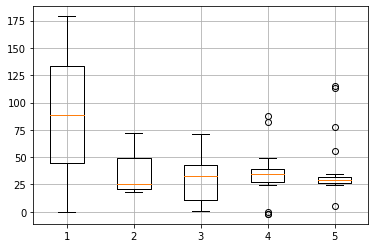

In [94]:
plt.boxplot(data5)
plt.grid(True)
plt.show()

In [95]:
t1_outliers = np.where((data5['T1'] > 50) | (data5['T1'] < 10) )[0]
t2_outliers = np.where((data5['T2'] > 50) | (data5['T2'] < 15) )[0]
outliers = np.concatenate((t1_outliers, t2_outliers))
print(outliers)

[  1  46  81  98 123  62  66  69  78 102]


In [96]:
data5 = data5.drop(outliers).reset_index(drop=True)

In [97]:
data5

,Time,Q1,Q2,T1,T2
0,0,29,18,24.44,24.77
1,2,29,18,24.48,24.89
2,3,29,18,24.48,24.89
3,4,29,18,24.51,24.89
4,5,29,18,24.51,24.77
...,...,...,...,...,...
156,175,49,71,41.85,34.34
157,176,49,71,42.04,34.50
158,177,49,71,42.17,34.63
159,178,49,71,42.17,34.88


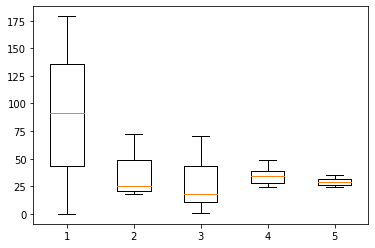

In [99]:
plt.boxplot(data5)
plt.show()

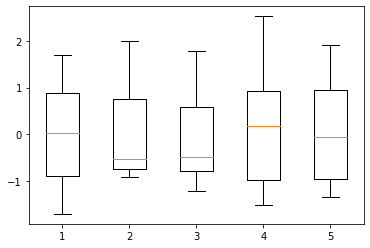

In [100]:
s = StandardScaler()
d5_scaled = s.fit_transform(data5)
plt.boxplot(d5_scaled)
plt.show()

In [104]:
train,test = train_test_split(d5_scaled, test_size=0.2, shuffle=True)
print(len(train),len(test))

128 33
